In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from xgboost import XGBClassifier, XGBRegressor
from sklearn.metrics import classification_report, accuracy_score, mean_squared_error, mean_absolute_error, r2_score, confusion_matrix
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

# Setup and Data Preprocessing

In [3]:
#Load dataset
df = pd.read_csv('G:\\GUVI PROJECT\\Final project\\Project 2\\data_synthetic.csv')


In [ ]:
#DATA OVERVIEW
#print(dr.head())
#print(df.info())
#print(df.describe())

In [4]:
#View the first few rows of the dataset:
df.head()

,Customer ID,Age,Gender,Marital Status,Occupation,Income Level,Education Level,Geographic Information,Location,Behavioral Data,...,Customer Preferences,Preferred Communication Channel,Preferred Contact Time,Preferred Language,Risk Profile,Previous Claims History,Credit Score,Driving Record,Life Events,Segmentation Group
0,84966,23,Female,Married,Entrepreneur,70541,Associate Degree,Mizoram,37534,policy5,...,Email,In-Person Meeting,Afternoon,English,1,3,728,DUI,Job Change,Segment5
1,95568,26,Male,Widowed,Manager,54168,Doctorate,Goa,63304,policy5,...,Mail,In-Person Meeting,Morning,French,1,2,792,Clean,Retirement,Segment5
2,10544,29,Female,Single,Entrepreneur,73899,Associate Degree,Rajasthan,53174,policy5,...,Email,Mail,Evening,German,2,1,719,Accident,Childbirth,Segment3
3,77033,20,Male,Divorced,Entrepreneur,63381,Bachelor's Degree,Sikkim,22803,policy5,...,Text,In-Person Meeting,Anytime,French,3,0,639,DUI,Job Change,Segment3
4,88160,25,Female,Separated,Manager,38794,Bachelor's Degree,West Bengal,92858,policy1,...,Email,Text,Weekends,English,0,3,720,Major Violations,Childbirth,Segment2


In [5]:
#Get the dataset's basic information:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53503 entries, 0 to 53502
Data columns (total 30 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Customer ID                         53503 non-null  int64 
 1   Age                                 53503 non-null  int64 
 2   Gender                              53503 non-null  object
 3   Marital Status                      53503 non-null  object
 4   Occupation                          53503 non-null  object
 5   Income Level                        53503 non-null  int64 
 6   Education Level                     53503 non-null  object
 7   Geographic Information              53503 non-null  object
 8   Location                            53503 non-null  int64 
 9   Behavioral Data                     53503 non-null  object
 10  Purchase History                    53503 non-null  object
 11  Policy Start Date                   53503 non-null  ob

In [6]:
#Summary statistics of the dataset:
print(df.describe())

         Customer ID           Age   Income Level      Location  \
count   53503.000000  53503.000000   53503.000000  53503.000000   
mean    52265.204998     44.140945   82768.324318  53703.032017   
std     28165.000067     15.079486   36651.075670  25404.953911   
min         1.000000     18.000000   20001.000000  10000.000000   
25%     28950.500000     32.000000   51568.500000  31510.500000   
50%     55858.000000     43.000000   80719.000000  55143.000000   
75%     76096.000000     57.000000  115973.500000  74951.000000   
max    100000.000000     70.000000  149999.000000  99999.000000   

       Claim History  Coverage Amount  Premium Amount    Deductible  \
count   53503.000000     53503.000000    53503.000000  53503.000000   
mean        2.522382    492580.789638     3023.702447   1115.662953   
std         1.749397    268405.505571     1285.834295    560.102855   
min         0.000000     50001.000000      500.000000    100.000000   
25%         1.000000    249613.500000    

In [7]:
# Identify non-numeric columns
non_numeric_columns = df.select_dtypes(exclude=[np.number]).columns
print("Non-numeric columns:", non_numeric_columns)

Non-numeric columns: Index(['Gender', 'Marital Status', 'Occupation', 'Education Level',
       'Geographic Information', 'Behavioral Data', 'Purchase History',
       'Policy Start Date', 'Policy Renewal Date',
       'Interactions with Customer Service', 'Insurance Products Owned',
       'Policy Type', 'Customer Preferences',
       'Preferred Communication Channel', 'Preferred Contact Time',
       'Preferred Language', 'Driving Record', 'Life Events',
       'Segmentation Group'],
      dtype='object')


In [63]:
# Identify numeric columns
numeric_df = df.select_dtypes(include=[np.number])
print("Numeric columns:", numeric_df)

Numeric columns:        Customer ID  Age  Gender  Marital Status  Occupation  Income Level  \
0            84966   23       0               1           3         70541   
1            95568   26       1               4           5         54168   
2            10544   29       0               3           3         73899   
3            77033   20       1               0           3         63381   
4            88160   25       0               2           5         38794   
...            ...  ...     ...             ...         ...           ...   
53498        44809   35       0               0           7        120850   
53499        65485   61       1               3           3        122309   
53500        26213   25       1               0           8         49258   
53501        63136   42       1               1           0         66301   
53502        62125   20       1               0           7        136632   

       Education Level  Geographic Information  Location  

In [ ]:
#Handling Missing Values:


In [9]:
#Check for missing values:
print(df.isnull().sum())


Customer ID                           0
Age                                   0
Gender                                0
Marital Status                        0
Occupation                            0
Income Level                          0
Education Level                       0
Geographic Information                0
Location                              0
Behavioral Data                       0
Purchase History                      0
Policy Start Date                     0
Policy Renewal Date                   0
Claim History                         0
Interactions with Customer Service    0
Insurance Products Owned              0
Coverage Amount                       0
Premium Amount                        0
Deductible                            0
Policy Type                           0
Customer Preferences                  0
Preferred Communication Channel       0
Preferred Contact Time                0
Preferred Language                    0
Risk Profile                          0


In [10]:
# Drop columns with a significant number of missing values (e.g., more than 50%)
threshold = len(df) * 0.5
df.dropna(thresh=threshold, axis=1, inplace=True)

# Fill missing values for numerical columns with mean
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

# Fill missing values for categorical columns with mode
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])


In [11]:
# Encode categorical variables
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

### Exploratory Data Analysis (EDA)


In [ ]:
#Data Distribution:

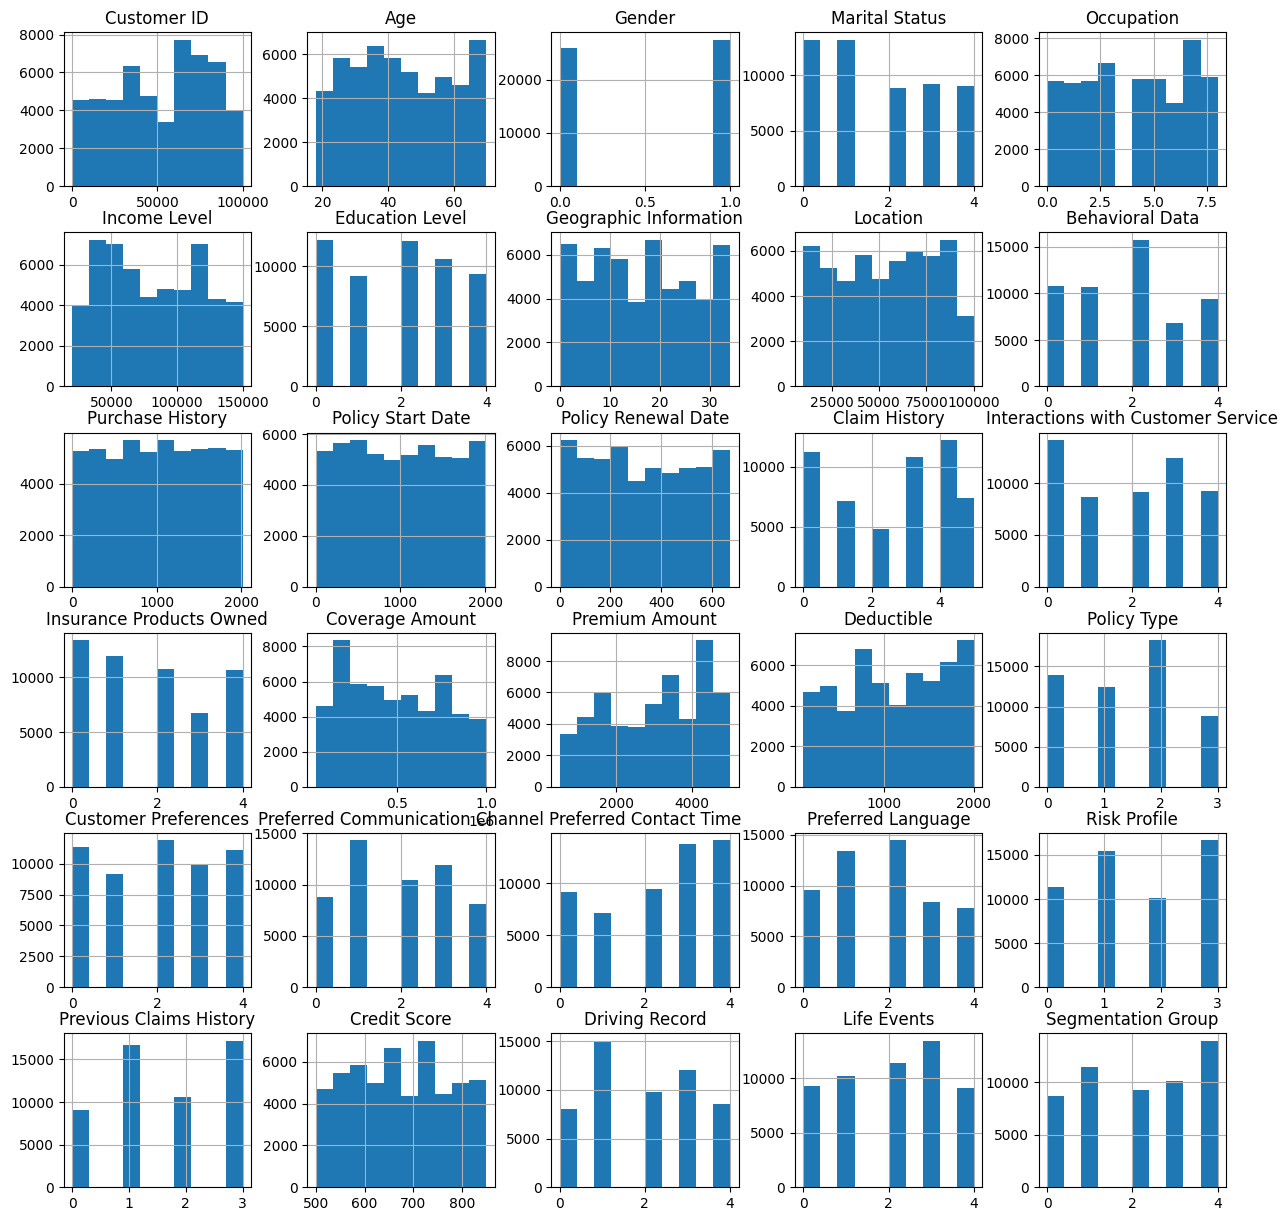

In [18]:
#Distribution of numerical features:
df.hist(figsize=(15,15))
plt.show()


In [19]:
#Distribution of categorical features:
for column in df.select_dtypes(include=['object']).columns:
    sns.countplot(y=column, data=df)
    plt.show()


In [ ]:
#Correlation Analysis:

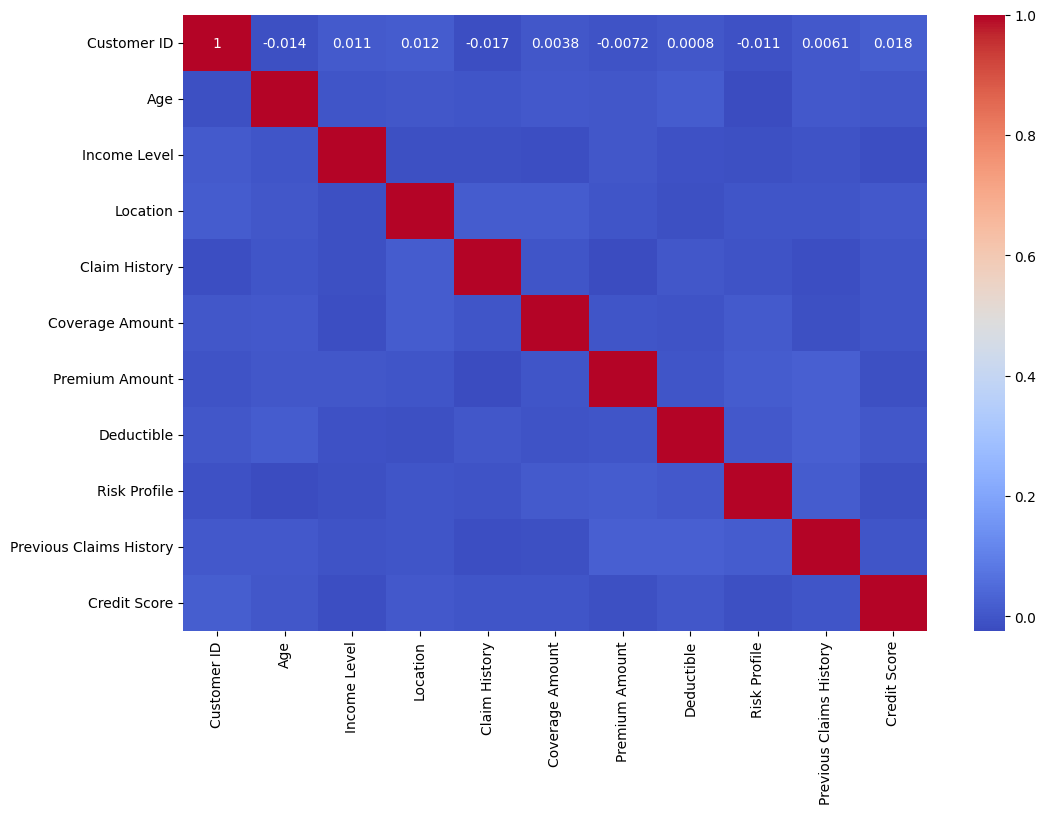

In [20]:
#Correlation matrix:
# Correlation matrix for numeric columns only
corr_matrix = numeric_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


In [23]:
#Feature Relationships:

In [24]:
# Box plots for categorical vs numerical features
for column in df.select_dtypes(include=['object']).columns:
    # Box plot for 'Claim History'
    sns.boxplot(x=column, y='Claim History', data=df)
    plt.title(f'Box plot of {column} vs Claim History')
    plt.show()

    # Box plot for 'Premium Amount'
    sns.boxplot(x=column, y='Premium Amount', data=df)
    plt.title(f'Box plot of {column} vs Premium Amount')
    plt.show()


# Classification (Fraud Detection)

In [26]:
# Split the dataset into features and target for classification
X_class = df.drop(columns=['Claim History', 'Premium Amount'])
y_class = df['Claim History']

In [27]:
# Train-test split for classification
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

In [28]:
# Train and evaluate Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train_class, y_train_class)
y_pred_log_reg = log_reg.predict(X_test_class)
print("Logistic Regression Classification Report:")
print(classification_report(y_test_class, y_pred_log_reg))
print("Logistic Regression Accuracy:", accuracy_score(y_test_class, y_pred_log_reg))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.23      0.28      0.25      2249
           1       0.00      0.00      0.00      1402
           2       0.00      0.00      0.00       906
           3       0.00      0.00      0.00      2192
           4       0.24      0.76      0.36      2452
           5       0.00      0.00      0.00      1500

    accuracy                           0.23     10701
   macro avg       0.08      0.17      0.10     10701
weighted avg       0.10      0.23      0.13     10701

Logistic Regression Accuracy: 0.23343612746472292


In [29]:
# Train and evaluate Decision Tree Classifier
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train_class, y_train_class)
y_pred_tree = tree_clf.predict(X_test_class)
print("Decision Tree Classification Report:")
print(classification_report(y_test_class, y_pred_tree))
print("Decision Tree Accuracy:", accuracy_score(y_test_class, y_pred_tree))

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.23      0.22      0.22      2249
           1       0.14      0.15      0.15      1402
           2       0.08      0.09      0.08       906
           3       0.22      0.21      0.21      2192
           4       0.24      0.24      0.24      2452
           5       0.14      0.14      0.14      1500

    accuracy                           0.19     10701
   macro avg       0.17      0.17      0.17     10701
weighted avg       0.19      0.19      0.19     10701

Decision Tree Accuracy: 0.18998224465003272


In [30]:
# Train and evaluate XGBoost Classifier
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_clf.fit(X_train_class, y_train_class)
y_pred_xgb = xgb_clf.predict(X_test_class)
print("XGBoost Classification Report:")
print(classification_report(y_test_class, y_pred_xgb))
print("XGBoost Accuracy:", accuracy_score(y_test_class, y_pred_xgb))

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.26      0.33      0.29      2249
           1       0.17      0.08      0.11      1402
           2       0.10      0.02      0.03       906
           3       0.24      0.29      0.26      2192
           4       0.25      0.39      0.31      2452
           5       0.19      0.08      0.11      1500

    accuracy                           0.24     10701
   macro avg       0.20      0.20      0.18     10701
weighted avg       0.22      0.24      0.22     10701

XGBoost Accuracy: 0.239977572189515


# Regression (Premium Prediction)

In [50]:
# Split the dataset into features and target for regression
X_reg = df.drop(columns=['Claim History', 'Premium Amount'])
y_reg = df['Premium Amount']

# Train-test split for regression
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Define a function to evaluate models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Model: {model.__class__.__name__}")
    print(f"MSE: {mse}")
    print(f"MAE: {mae}")
    print(f"R2 Score: {r2}")
    print("-" * 30)
    return mse, mae, r2

# Train and evaluate Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train_reg, y_train_reg)
evaluate_model(lin_reg, X_test_reg, y_test_reg)

# Train and evaluate Decision Tree Regressor
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train_reg, y_train_reg)
evaluate_model(tree_reg, X_test_reg, y_test_reg)

# Train and evaluate RandomForest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train_reg, y_train_reg)
evaluate_model(rf_regressor, X_test_reg, y_test_reg)

# Train and evaluate XGBoost Regressor
xgb_reg = XGBRegressor(random_state=42, eval_metric='rmse')
xgb_reg.fit(X_train_reg, y_train_reg)
evaluate_model(xgb_reg, X_test_reg, y_test_reg)


Model: LinearRegression
MSE: 1636478.1772712388
MAE: 1110.59973126265
R2 Score: -0.00045178974723802945
------------------------------
Model: DecisionTreeRegressor
MSE: 3328154.508737501
MAE: 1478.098121670872
R2 Score: -1.034648662638351
------------------------------
Model: RandomForestRegressor
MSE: 1653381.6517289132
MAE: 1116.0497065694794
R2 Score: -0.010785634407681766
------------------------------
Model: XGBRegressor
MSE: 1738580.0929284082
MAE: 1131.3140600439924
R2 Score: -0.06287122538319889
------------------------------


(1738580.0929284082, 1131.3140600439924, -0.06287122538319889)

# Clustering (Customer Segmentation)

In [42]:

# Apply KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_reg)

# Evaluate clustering
sil_score = silhouette_score(X_reg, df['Cluster'])
print(f"Silhouette Score: {sil_score}")

# Analyze cluster characteristics
for cluster in range(5):
    cluster_data = df[df['Cluster'] == cluster]
    print(f"Cluster {cluster} Characteristics:")
    print(cluster_data.describe())
    print("-" * 30)


Silhouette Score: 0.42022762772646693
Cluster 0 Characteristics:
        Customer ID           Age        Gender  Marital Status    Occupation  \
count   10095.00000  10095.000000  10095.000000    10095.000000  10095.000000   
mean    52093.76632     43.996335      0.534225        1.785042      4.063001   
std     28534.22057     15.101318      0.498852        1.429457      2.562821   
min         1.00000     18.000000      0.000000        0.000000      0.000000   
25%     27671.50000     31.000000      0.000000        1.000000      2.000000   
50%     55850.00000     43.000000      1.000000        2.000000      4.000000   
75%     76352.50000     56.000000      1.000000        3.000000      6.000000   
max    100000.00000     70.000000      1.000000        4.000000      8.000000   

        Income Level  Education Level  Geographic Information      Location  \
count   10095.000000     10095.000000            10095.000000  10095.000000   
mean    83119.947796         1.860723          

#### Fine-tuning Models

In [40]:
# Fine-tune Decision Tree Regressor
tree_params = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

tree_grid_search = GridSearchCV(estimator=tree_reg, param_grid=tree_params, cv=3, n_jobs=-1, verbose=2)
tree_grid_search.fit(X_train_reg, y_train_reg)

print("Best parameters for Decision Tree:", tree_grid_search.best_params_)
evaluate_model(tree_grid_search.best_estimator_, X_test_reg, y_test_reg)

# Fine-tune XGBoost Regressor
xgb_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

xgb_grid_search = GridSearchCV(estimator=xgb_reg, param_grid=xgb_params, cv=3, n_jobs=-1, verbose=2)
xgb_grid_search.fit(X_train_reg, y_train_reg)

print("Best parameters for XGBoost:", xgb_grid_search.best_params_)
evaluate_model(xgb_grid_search.best_estimator_, X_test_reg, y_test_reg)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best parameters for Decision Tree: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Model: DecisionTreeRegressor
MSE: 1735408.6466219483
MAE: 1132.8204025712218
R2 Score: -0.06093237940440566
------------------------------
Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Model: XGBRegressor
MSE: 1622037.7118521405
MAE: 1104.7515827731856
R2 Score: 0.008376308099694363
------------------------------


array([2985.1833, 3072.0312, 3205.4502, ..., 3107.7485, 3126.421 ,
       3054.829 ], dtype=float32)

# 5 Reporting and Visualization

In [44]:
# Fraud Detection Results
print("Fraud Detection Results")
print("------------------------")
print("Classification Report:")
print(classification_report(y_test_class, y_pred_xgb))
print("Accuracy:", accuracy_score(y_test_class, y_pred_xgb))

Fraud Detection Results
------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.26      0.33      0.29      2249
           1       0.17      0.08      0.11      1402
           2       0.10      0.02      0.03       906
           3       0.24      0.29      0.26      2192
           4       0.25      0.39      0.31      2452
           5       0.19      0.08      0.11      1500

    accuracy                           0.24     10701
   macro avg       0.20      0.20      0.18     10701
weighted avg       0.22      0.24      0.22     10701

Accuracy: 0.239977572189515


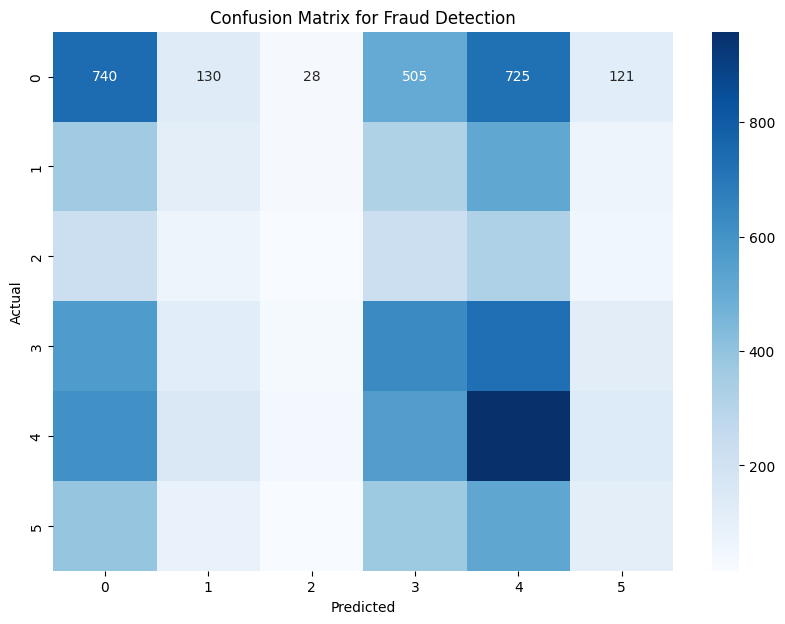

In [46]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test_class, y_pred_xgb)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test_class), yticklabels=np.unique(y_test_class))
plt.title('Confusion Matrix for Fraud Detection')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [51]:
# Premium Prediction Results
print("\nPremium Prediction Results")
print("---------------------------")
y_pred_rf_reg = rf_regressor.predict(X_test_reg)
mse = mean_squared_error(y_test_reg, y_pred_rf_reg)
rmse = np.sqrt(mse)
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


Premium Prediction Results
---------------------------
Mean Squared Error (MSE): 1653381.6517289132
Root Mean Squared Error (RMSE): 1285.838890269272


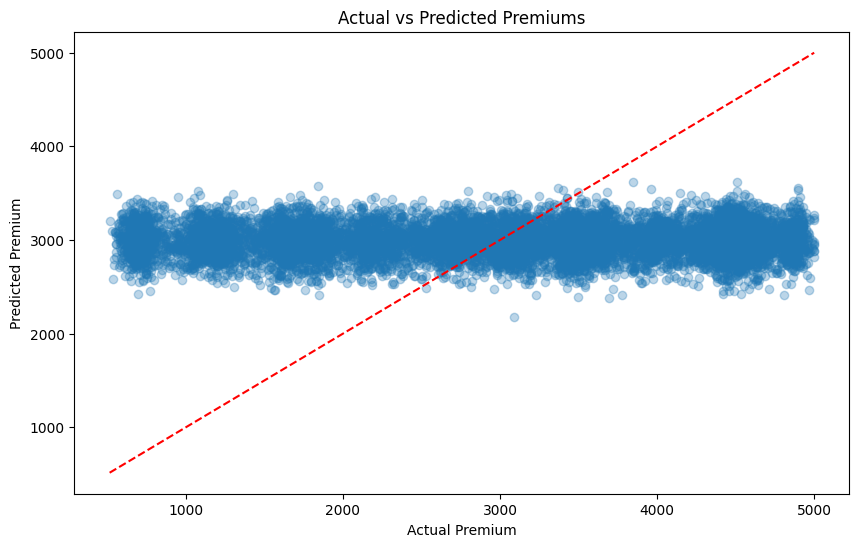

In [52]:
# Plot Actual vs Predicted Premiums
plt.figure(figsize=(10, 6))
plt.scatter(y_test_reg, y_pred_rf_reg, alpha=0.3)
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'r--')
plt.xlabel('Actual Premium')
plt.ylabel('Predicted Premium')
plt.title('Actual vs Predicted Premiums')
plt.show()

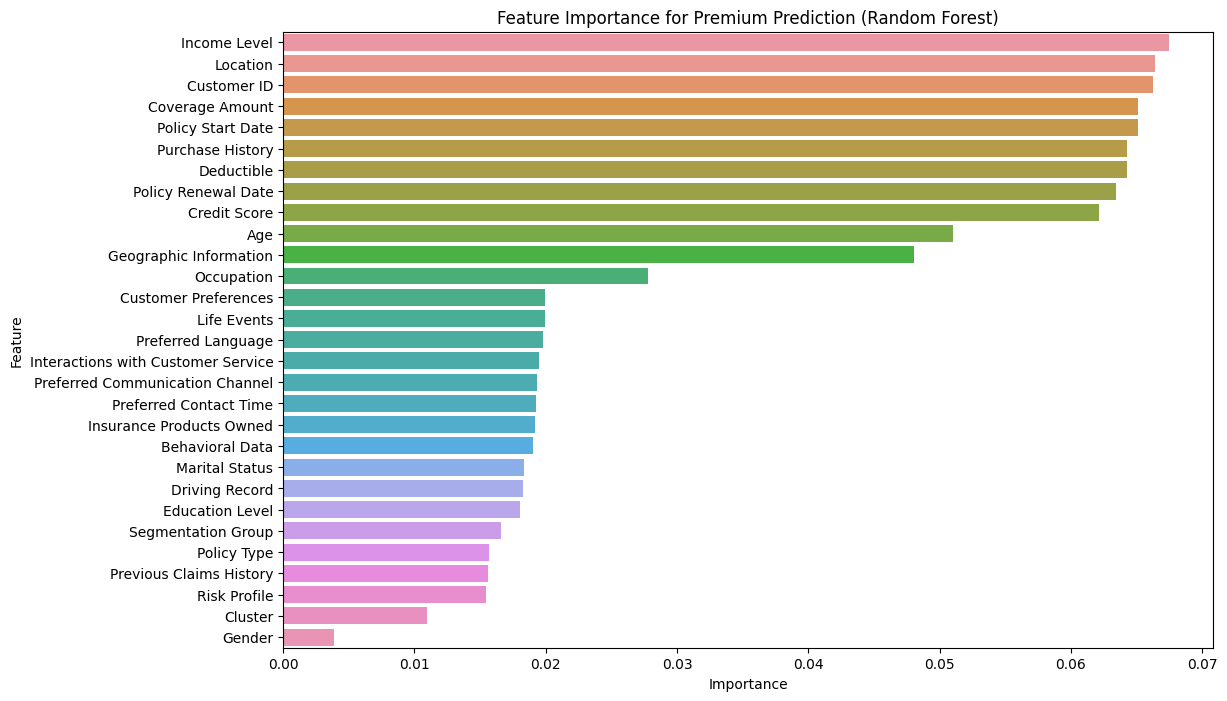

In [53]:
# Feature Importance for Premium Prediction (Random Forest)
feature_importances = rf_regressor.feature_importances_
features = X_train_reg.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance for Premium Prediction (Random Forest)')
plt.show()

##### Important Results Summary

In [54]:
# Fraud Detection Summary
fraud_detection_summary = classification_report(y_test_class, y_pred_xgb, output_dict=True)
fraud_detection_summary_df = pd.DataFrame(fraud_detection_summary).transpose()
print("\nFraud Detection Summary")
print(fraud_detection_summary_df)


Fraud Detection Summary
              precision    recall  f1-score       support
0              0.256321  0.329035  0.288162   2249.000000
1              0.166417  0.079173  0.107298   1402.000000
2              0.100000  0.017660  0.030019    906.000000
3              0.241737  0.286953  0.262411   2192.000000
4              0.253977  0.390701  0.307841   2452.000000
5              0.185971  0.076000  0.107903   1500.000000
accuracy       0.239978  0.239978  0.239978      0.239978
macro avg      0.200737  0.196587  0.183939  10701.000000
weighted avg   0.217921  0.239978  0.216577  10701.000000


In [55]:
# Premium Prediction Summary
premium_prediction_summary = {
    'Mean Squared Error': mse,
    'Root Mean Squared Error': rmse
}
print("\nPremium Prediction Summary")
print(premium_prediction_summary)


Premium Prediction Summary
{'Mean Squared Error': 1653381.6517289132, 'Root Mean Squared Error': 1285.838890269272}


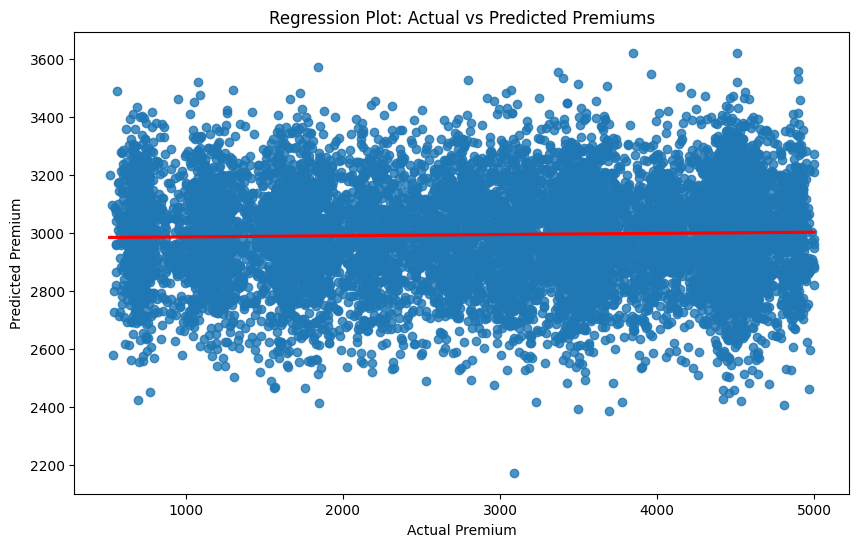

In [56]:
# Visualizing Predicted vs Actual Premiums
plt.figure(figsize=(10, 6))
sns.regplot(x=y_test_reg, y=y_pred_rf_reg, line_kws={"color": "red"})
plt.xlabel('Actual Premium')
plt.ylabel('Predicted Premium')
plt.title('Regression Plot: Actual vs Predicted Premiums')
plt.show()

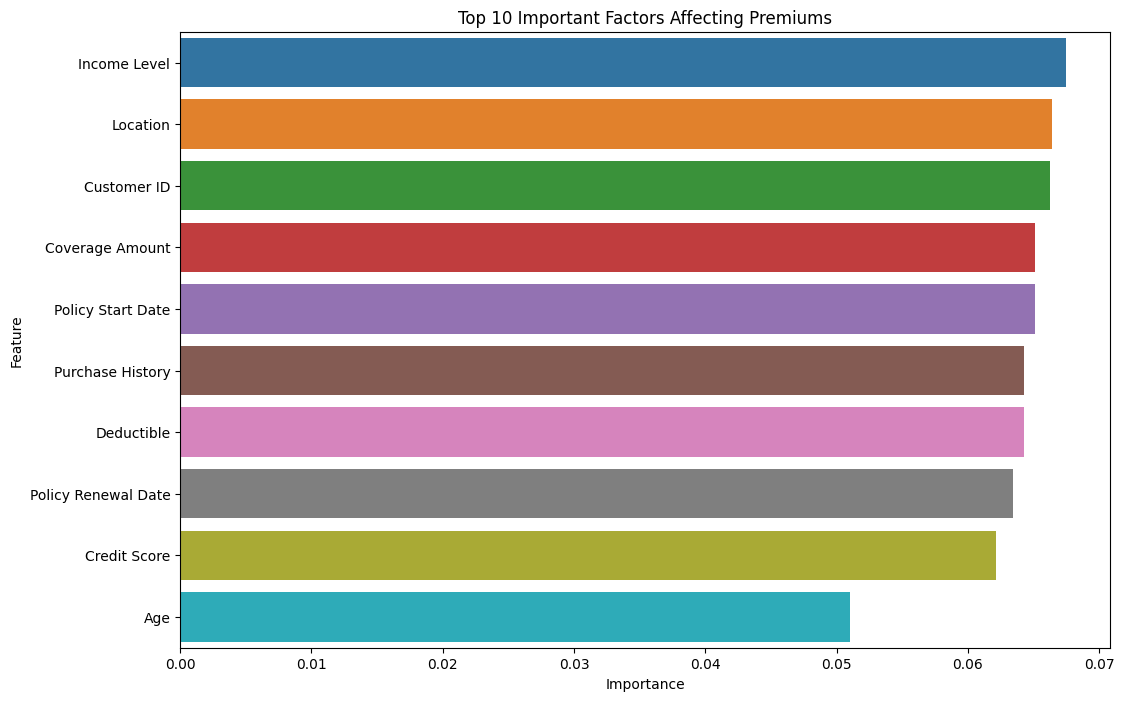

In [57]:
# Important Factors Affecting Premiums (Top 10 Features)
top_10_features = feature_importance_df.head(10)
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=top_10_features)
plt.title('Top 10 Important Factors Affecting Premiums')
plt.show()
